<h1>SciPy integration</h1>

(1.7724538509055159, 1.4202636756659625e-08)
1.7691519293275642


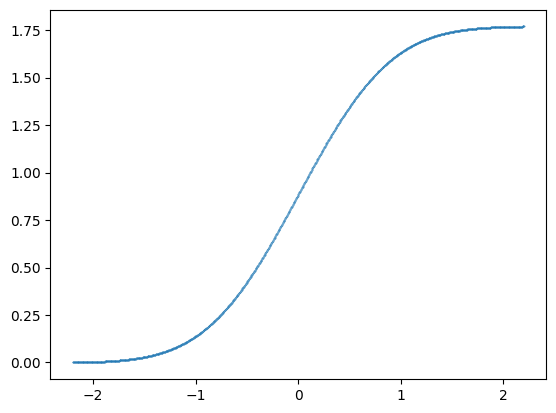

In [14]:
from scipy.integrate import quad, cumulative_trapezoid
import numpy as np
import matplotlib.pyplot as plt
f = lambda x: np.exp(-x*x)
print(quad(f, -np.inf, np.inf))

x_list = np.linspace(-2.2, 2.2, 1000)
y_list = f(x_list)
cumul_trap = cumulative_trapezoid(y_list, x_list)
plt.scatter(x_list[1:], cumul_trap, s=.1)

print(cumul_trap[-1])


Tripple integral

Problem 7. Probability

In [46]:
from scipy.integrate import tplquad
import numpy as np

def integrand_1(z, x, y):
    return 1

volume = tplquad(integrand_1, -2, 2, 
                lambda y: 0, lambda y: np.sqrt(4-y*y), 
                lambda y, x: 0, lambda y, x: 3*x)
print(f'{volume=}') # correct 16 ++

prob_1 = tplquad(integrand_1, -2, 2, 
                lambda y: 0, lambda y: np.sqrt(4-y*y), 
                lambda y, x: 0, lambda y, x: 2*x)
prob_1 = 1/volume[0]*prob_1[0]
print(f'{prob_1=}') # correct 2/3 ++


    #Another integrand

def integrand_2(z, x, y):
    return z**2

total_integral = tplquad(integrand_2, -2, 2,
                lambda y: 0, lambda y: np.sqrt(4-y*y), 
                lambda y, x: 0, lambda y, x: 3*x)
print(f'{total_integral=}') # correct 76.8 ++

prob_2 = tplquad(integrand_2, -2, 2, 
                lambda y: 0, lambda y: np.sqrt(4-y*y), 
                lambda y, x: 0, lambda y, x: 2*x)
prob_2 = 1/total_integral[0]*prob_2[0]
print(f'{prob_2=}') # correct 8/27 ++


    #Another order of integration

def integrand_2(x, y, z):
    return z**2

total_integral = tplquad(integrand_2, 0, 6,
                lambda z: -np.sqrt(4-(z/3)**2), lambda z: np.sqrt(4-(z/3)**2), 
                lambda z, y: z/3, lambda z, y: np.sqrt(4-y**2))
print(f'{total_integral=}') # correct 76.8 ++


    #Previous integral in CYLINDRICAL COODRDINATES

def integrand_3(r, phi, z):
    return r * z**2

total_integral = tplquad(integrand_3, 0, 6,
                lambda z: -np.arccos(z/6), lambda z: np.arccos(z/6), 
                lambda z, phi: z/(3*np.cos(phi)), lambda z, phi: 2)
print(f'{total_integral=}') # correct 76.8 ++

prob_3 = tplquad(integrand_3, 0, 4,
                lambda z: -np.arccos(z/4), lambda z: np.arccos(z/4), 
                lambda z, phi: z/(2*np.cos(phi)), lambda z, phi: 2)
prob_3 = 1/total_integral[0]*prob_3[0]
print(f'{prob_3=}') # correct 8/27 (0.296...) ++

volume=(16.000000000000004, 1.776356839400251e-13)
prob_1=0.6666666666666665
total_integral=(76.80000000000001, 8.526512829121203e-13)
prob_2=0.29629629629629634
total_integral=(76.7999999992105, 8.530048272185124e-07)
total_integral=(76.79999999920236, 8.530048273625792e-07)
prob_3=0.2962962962962963


ODEs

In [47]:
import sympy as smp
from sympy.abc import t
y = smp.Function('y')
y = y(t)

eq = y.diff(t,1) - y*t

print(eq)
smp.dsolve(eq, y)

-t*y(t) + Derivative(y(t), t)


Eq(y(t), C1*exp(t**2/2))

$ y' = y*t $

Solution: $ y = exp(t^2 / 2) $

In [52]:
from scipy.integrate import solve_ivp

def f(t, y):
    return t*y

soln = solve_ivp(f, [0,5], [1]) 
soln.y

array([[1.00000000e+00, 1.00000000e+00, 1.00000061e+00, 1.00006161e+00,
        1.00619069e+00, 1.85416577e+00, 7.09560179e+00, 3.23388089e+01,
        1.46763491e+02, 6.49286549e+02, 3.22183905e+03, 1.64613176e+04,
        8.33779608e+04, 2.68182450e+05]])

$ y'' = y'y $

[$ u_1' = u_2 $;   $ u_2' = u_2u_1 $]

18 18


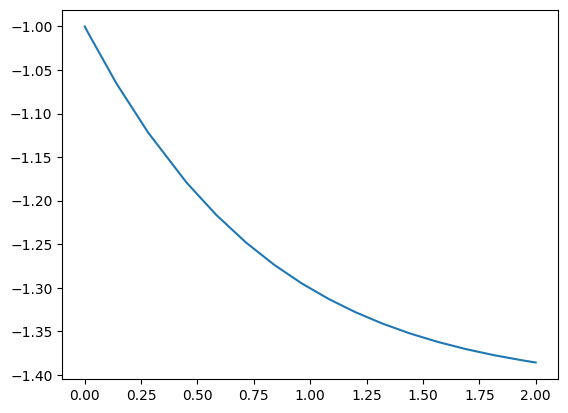

In [111]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# ORDER OF ARGS MATTERS
def f(t, y):
    return [y[1], y[1]*y[0]]


rtol, atol = (1e-8, 1e-8)
soln = solve_ivp(f, [0, 2], [-1,-0.5], rtol=rtol, atol=atol)
print(len(soln.y[0]), len(soln.t))

plt.plot(soln.t, soln.y[0])